In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st 
import matplotlib.pyplot as plt

In [2]:
#create file and read in csv 
file_path = "mxmh_survey_results.csv"
mental_health_data_df = pd.read_csv(file_path)
mental_health_data_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
mental_health_data_df['Primary streaming service'].fillna(value='N/A', inplace=True)
mental_health_data_df['BPM'].fillna(value= -1, inplace=True)
mental_health_data_df['Music effects'].fillna(value='N/A', inplace=True)
mental_health_data_df['While working'].fillna(value='N/A', inplace=True)
del mental_health_data_df['Instrumentalist']
del mental_health_data_df['Foreign languages']
del mental_health_data_df['Composer']
del mental_health_data_df['Permissions']

In [4]:
mental_health_data_df = mental_health_data_df.dropna(how='any')
mental_health_data_df.head()
mental_health_data_df_40_under = mental_health_data_df[mental_health_data_df['Age'] < 40].copy()

Exploring the relationship between age groups and self-reported level of mental illness severity. 

In [5]:
#age bins
age_bins = [10,19,29,39]
age_labels = ["Teenage(10-19)", "Young adults(20-29)", "Adults(30-39)"]
#add age bins
mental_health_data_df_40_under['Age group'] = pd.cut(mental_health_data_df_40_under['Age'], age_bins, labels=age_labels)
mental_health_data_df_40_under.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Age group
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156.0,Rarely,Never,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A,Teenage(10-19)
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132.0,Never,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,Teenage(10-19)
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107.0,Never,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,Teenage(10-19)
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Jazz,Yes,86.0,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,Teenage(10-19)
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66.0,Sometimes,Never,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,Teenage(10-19)


In [6]:
mental_health_data_df_40_under_copy = mental_health_data_df_40_under.copy()
mental_health_data_df_40_under.set_index('Age group', inplace=True)
mental_health_data_df_40_under.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
Age group,,,,,,,,,,,,,,,,,,,,,
Teenage(10-19),8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156.0,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A
Teenage(10-19),8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132.0,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
Teenage(10-19),8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107.0,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
Teenage(10-19),8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Jazz,Yes,86.0,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
Teenage(10-19),8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66.0,Sometimes,Never,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [7]:
generation_groups = mental_health_data_df_40_under.groupby('Age group')
mean_by_generation = generation_groups.mean()
del mean_by_generation['Age']
del mean_by_generation['Hours per day']
del mean_by_generation['BPM']
mean_by_generation

,Anxiety,Depression,Insomnia,OCD
Age group,,,,
Teenage(10-19),5.833893,4.442953,3.619128,2.721477
Young adults(20-29),6.195652,5.492754,3.641304,2.768116
Adults(30-39),6.097561,5.219512,4.621951,2.939024


In [8]:
median_by_generation = generation_groups.median()
del median_by_generation['Age']
del median_by_generation['Hours per day']
del median_by_generation['BPM']
median_by_generation

,Anxiety,Depression,Insomnia,OCD
Age group,,,,
Teenage(10-19),6.0,5.0,3.0,2.0
Young adults(20-29),7.0,6.0,3.0,2.0
Adults(30-39),7.0,6.0,5.0,2.0


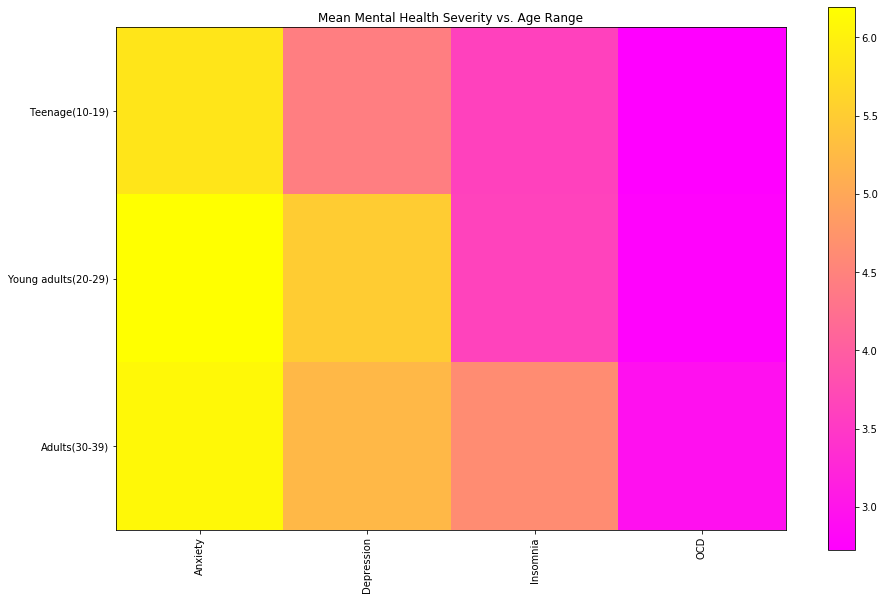

In [9]:
mental_illness_labels = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig, ax = plt.subplots(figsize=(15,10))
#create heat map
mean_im = ax.imshow(mean_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(mean_im, ax=ax)

# add labels
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)

# display plot
plt.title('Mean Mental Health Severity vs. Age Range')
plt.savefig('Mean_heat.png')
plt.show()

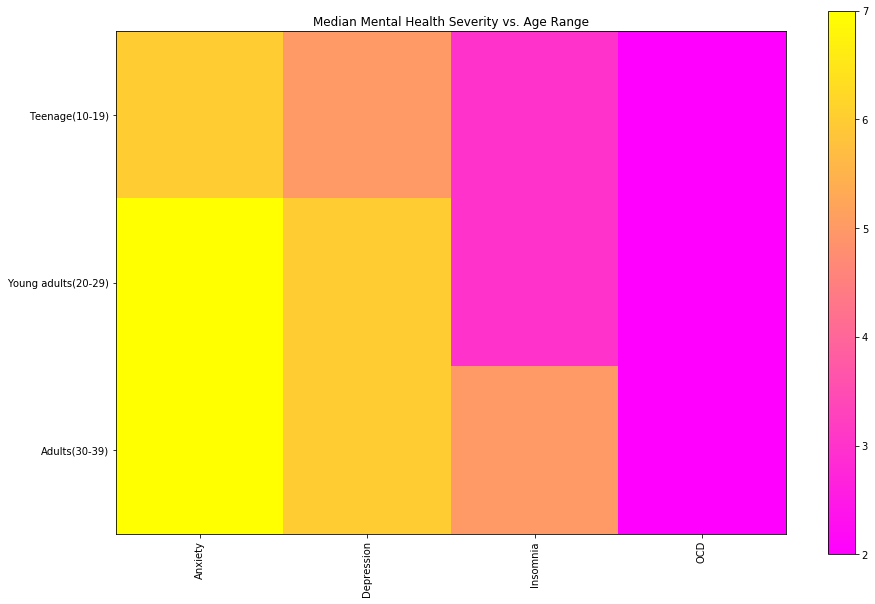

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
#create heat map
median_im = ax.imshow(median_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(median_im, ax=ax)

# add labels
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)
# display plot
plt.title('Median Mental Health Severity vs. Age Range')
plt.savefig('Median_heat.png')
plt.show()

From this data there are a few things I would want to observe after looking at this data. As age increases we see an inverse relationship with self-reported mental illness severity. My gut instinct is to say this data DOES NOT imply older people expierence less mental health problems. Rather, this data leads me to want to re-evaluate the population in some way to determine whether or older people are less aware of their mental health or less willing to admit to themselves they may suffer from some sort of mental illness. We could infer possible social destigmaisation of mental health problems in younger geneations. 

In [11]:
#create tempo bins
tempo_bins = [0, 76, 120, 700]
tempo_labels = ['Slow', 'Medium', 'Fast']
#create tempo data frame, there is one extraneous value of some grossly high value that no song could feasibly be
tempo_df = mental_health_data_df[mental_health_data_df['BPM'] <701].copy()
tempo_df['Tempo'] = pd.cut(mental_health_data_df['BPM'], tempo_bins, labels=tempo_labels,)

In [12]:
tempo_median = tempo_df.groupby('Tempo')
tempo_median = tempo_median.median()
del tempo_median['Age']
del tempo_median['Hours per day']
del tempo_median['BPM']
tempo_median.head()

,Anxiety,Depression,Insomnia,OCD
Tempo,,,,
Slow,7.0,6.0,2.0,2.0
Medium,6.0,5.0,3.0,2.0
Fast,6.0,5.0,4.0,2.0


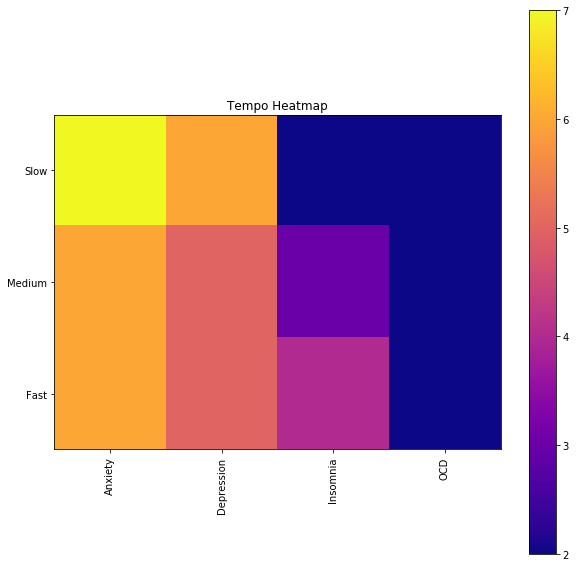

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
#create heatmap
tempo_median_im = ax.imshow(tempo_median, cmap='plasma')
#add colour bar
tempo_cbar = ax.figure.colorbar(tempo_median_im, ax=ax)
#add labels 
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(tempo_labels)))
ax.set_yticklabels(tempo_labels)
#display plot
plt.title('Tempo Heatmap')
plt.savefig('Tempo_heat.png')
plt.show()

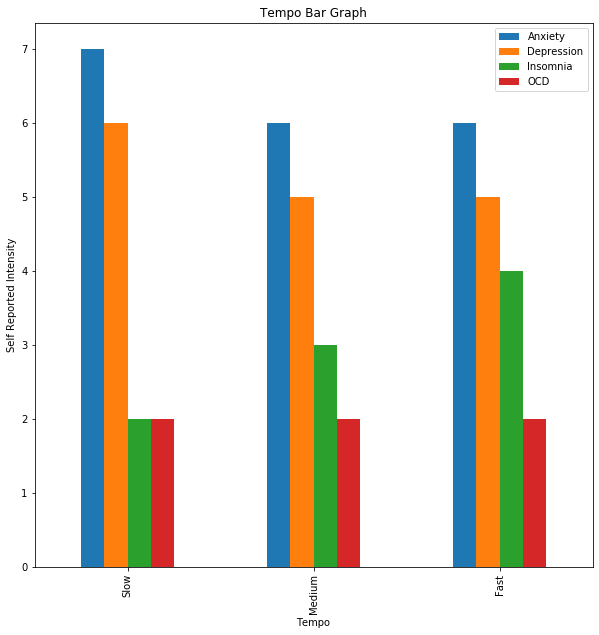

In [14]:
tempo_median.plot(kind='bar', figsize=(10,10))
plt.title('Tempo Bar Graph')
plt.ylabel('Self Reported Intensity')
plt.savefig('Tempo_Bar.png')
plt.show()

The r value for Anxiety: 0.029758071172333974


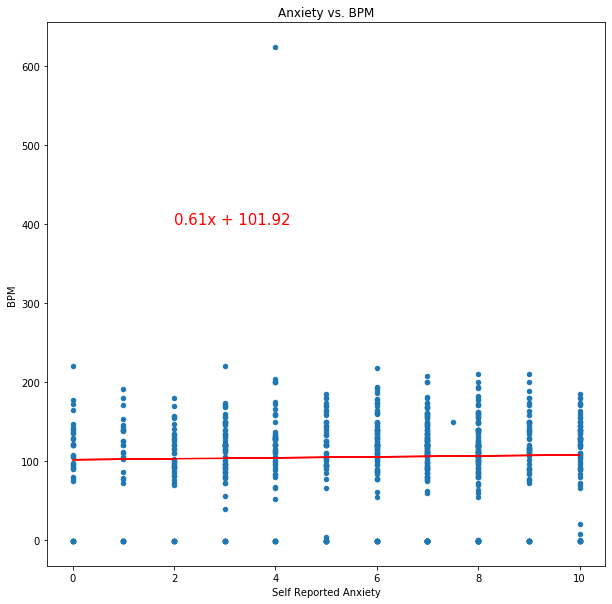

In [15]:
tempo_df.plot(kind ='scatter', x = 'Anxiety', y='BPM', figsize=(10,10))
plt.xlabel('Self Reported Anxiety')
plt.ylabel('BPM')
plt.title('Anxiety vs. BPM')
(anx_slope, anx_int, anx_r, anx_p, anx_std_err) = st.linregress(tempo_df['Anxiety'], tempo_df['BPM'])
anx_regress = tempo_df['Anxiety']*anx_slope + anx_int
anx_line = f'{round(anx_slope, 2)}x + {round(anx_int, 2)}'
plt.plot(tempo_df['Anxiety'], anx_regress, 'r-')
plt.annotate(anx_line, (2,400), fontsize=15, color='red')
print(f'The r value for Anxiety: {anx_r}')
plt.savefig('Anxiety.png')
plt.show()

The r value for OCD: -0.0026174526065235277


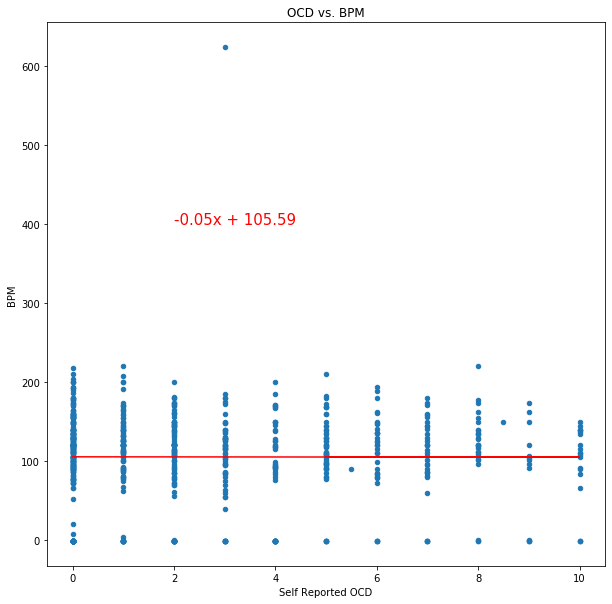

In [16]:
tempo_df.plot(kind ='scatter', x = 'OCD', y='BPM', figsize=(10,10))
plt.xlabel('Self Reported OCD')
plt.ylabel('BPM')
plt.title('OCD vs. BPM')
(ocd_slope, ocd_int, ocd_r, ocd_p, ocd_std_err) = st.linregress(tempo_df['OCD'], tempo_df['BPM'])
ocd_regress = tempo_df['OCD']*ocd_slope + ocd_int
ocd_line = f'{round(ocd_slope, 2)}x + {round(ocd_int, 2)}'
plt.plot(tempo_df['OCD'], ocd_regress, 'r-')
plt.annotate(ocd_line, (2,400), fontsize=15, color='red')
print(f'The r value for OCD: {ocd_r}')
plt.savefig('OCD.png')
plt.show()

The r value for Insomnia: 0.05514467687412621


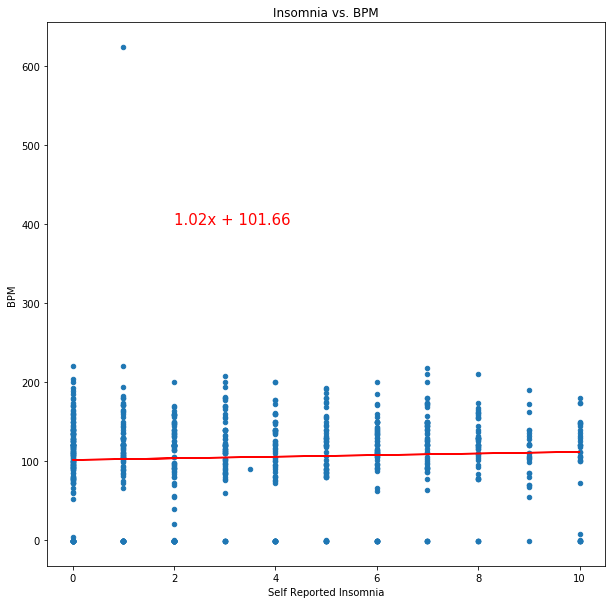

In [17]:
tempo_df.plot(kind ='scatter', x = 'Insomnia', y='BPM', figsize=(10,10))
plt.xlabel('Self Reported Insomnia')
plt.ylabel('BPM')
plt.title('Insomnia vs. BPM')
(ins_slope, ins_int, ins_r, ins_p, ins_std_err) = st.linregress(tempo_df['Insomnia'], tempo_df['BPM'])
ins_regress = tempo_df['Insomnia']*ins_slope + ins_int
ins_line = f'{round(ins_slope, 2)}x + {round(ins_int, 2)}'
plt.plot(tempo_df['Insomnia'], ins_regress, 'r-')
plt.annotate(ins_line, (2,400), fontsize=15, color='red')
print(f'The r value for Insomnia: {ins_r}')
plt.savefig('Insomnia.png')
plt.show()

The r value for Depression: 0.07533450012590873


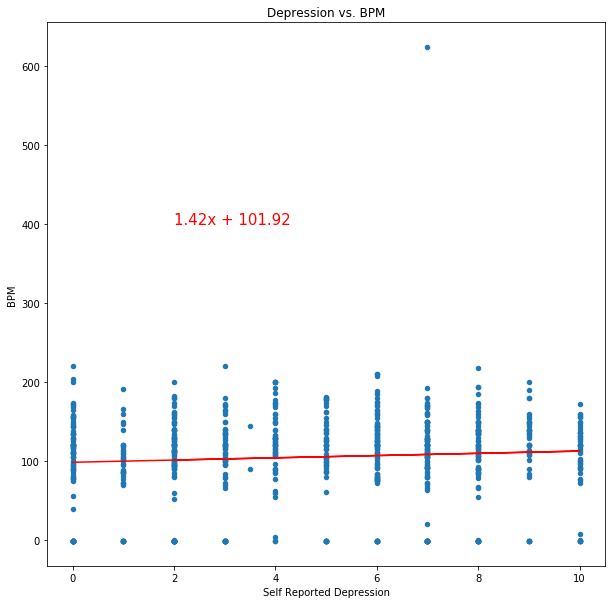

In [18]:
tempo_df.plot(kind ='scatter', x = 'Depression', y='BPM', figsize=(10,10))
plt.xlabel('Self Reported Depression')
plt.ylabel('BPM')
plt.title('Depression vs. BPM')
(dep_slope, dep_int, dep_r, dep_p, dep_std_err) = st.linregress(tempo_df['Depression'], tempo_df['BPM'])
dep_regress = tempo_df['Depression']*dep_slope + dep_int
dep_line = f'{round(dep_slope, 2)}x + {round(anx_int, 2)}'
plt.plot(tempo_df['Depression'], dep_regress, 'r-')
plt.annotate(dep_line, (2,400), fontsize=15, color='red')
print(f'The r value for Depression: {dep_r}')
plt.savefig('Depression.png')
plt.show()